In [1]:
# Import helpful libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x:'%.3f' % x)

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

# EDA

In [2]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

print(df.shape)
df.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,...,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,1,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,1,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,1,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000,0.373,0.484,0.000,0.000,0.000,1.000,1.000
radius_mean,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
texture_mean,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
perimeter_mean,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
area_mean,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
smoothness_mean,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
compactness_mean,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
concavity_mean,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
concave points_mean,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
symmetry_mean,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


In [4]:
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'M=1  B=0')

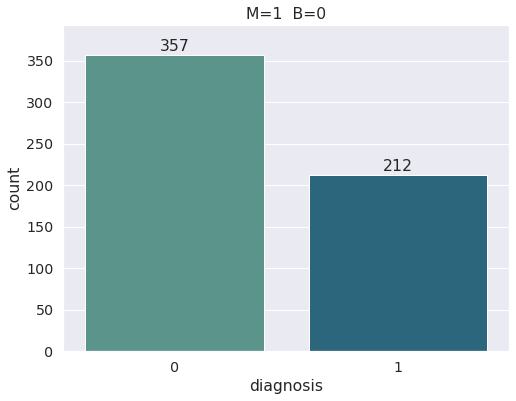

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(df.diagnosis, palette='crest')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

ax.set_title('M=1  B=0')

## Correlation analysis

<AxesSubplot:>

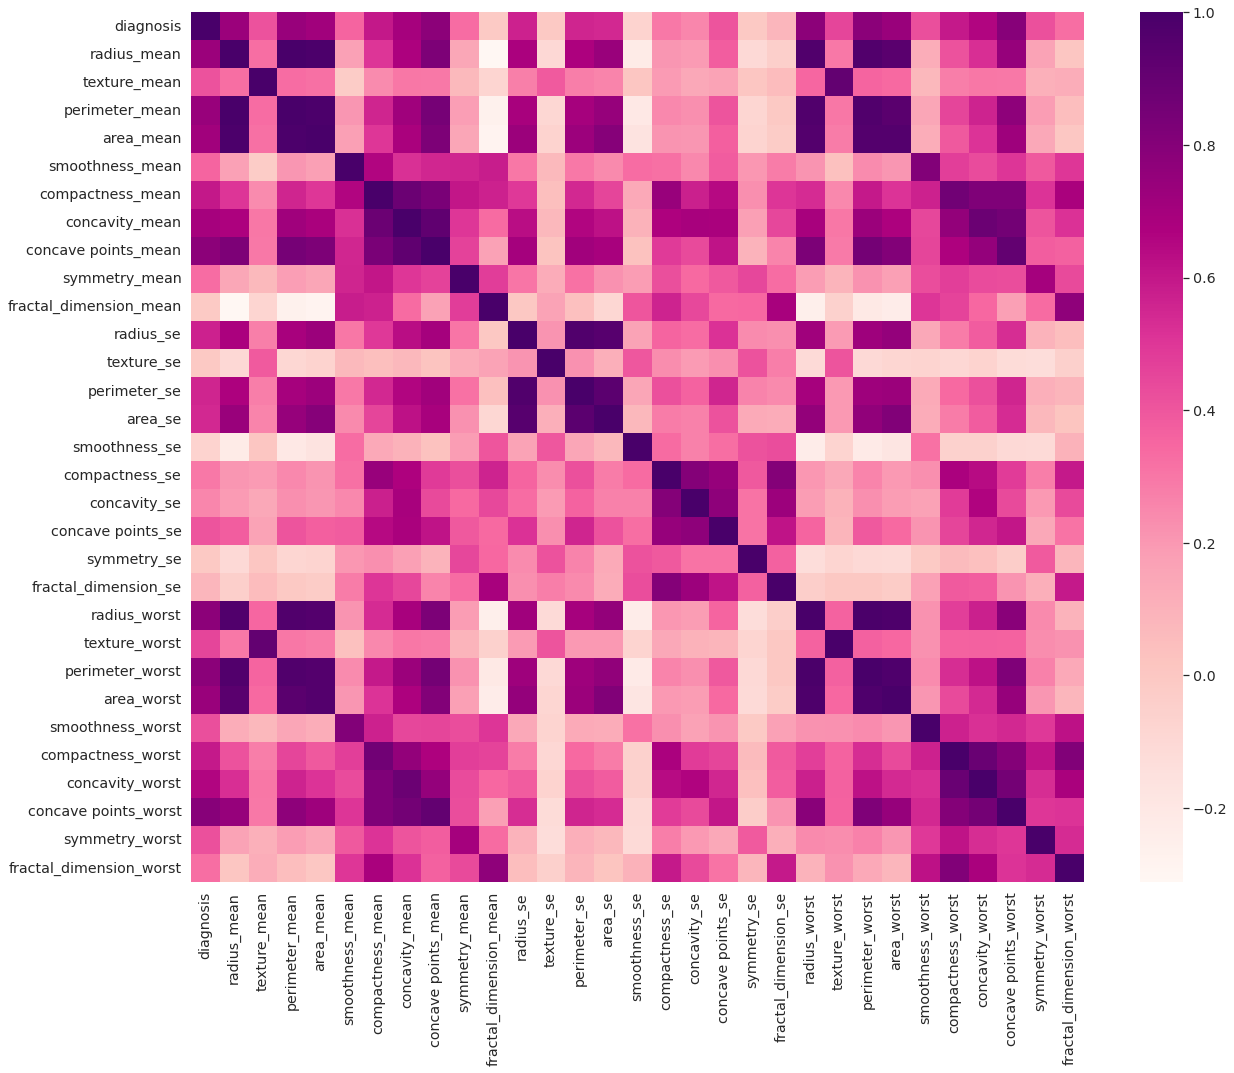

In [6]:
plt.figure(figsize=(20, 16))

corr = df.corr()
sns.heatmap(corr, cmap='RdPu', fmt='.2f')

In [7]:
# Find most important features relative to target
corr.sort_values(['diagnosis'], ascending=False, inplace=True)
corr.diagnosis[:25]

diagnosis                 1.000
concave points_worst      0.794
perimeter_worst           0.783
concave points_mean       0.777
radius_worst              0.776
perimeter_mean            0.743
area_worst                0.734
radius_mean               0.730
area_mean                 0.709
concavity_mean            0.696
concavity_worst           0.660
compactness_mean          0.597
compactness_worst         0.591
radius_se                 0.567
perimeter_se              0.556
area_se                   0.548
texture_worst             0.457
smoothness_worst          0.421
symmetry_worst            0.416
texture_mean              0.415
concave points_se         0.408
smoothness_mean           0.359
symmetry_mean             0.330
fractal_dimension_worst   0.324
compactness_se            0.293
Name: diagnosis, dtype: float64

In [8]:
df_skew = pd.DataFrame(data={
    'skewness': df.skew()
})

df_skew

,skewness
diagnosis,0.528
radius_mean,0.942
texture_mean,0.650
perimeter_mean,0.991
area_mean,1.646
smoothness_mean,0.456
compactness_mean,1.190
concavity_mean,1.401
concave points_mean,1.171
symmetry_mean,0.726


## Log transformation our skewed data

In [9]:
df.radius_se = np.log(df.radius_se + 1)
df.perimeter_se = np.log(df.perimeter_se + 1)
df.area_se = np.log(df.area_se)
df.concavity_se = np.log(df.concavity_se + 1)
df.fractal_dimension_se = np.log(df.fractal_dimension_se)

## Detect and remove the outliers with Z-score

In [10]:
z = np.abs(stats.zscore(df))

print(df.shape)

(569, 31)


In [11]:
df = df[(z < 3).all(axis=1)]

print(df.shape)
df.head()

(496, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,1,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
4,1,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077
5,1,12.450,15.700,82.570,477.100,0.128,0.170,0.158,0.081,0.209,...,15.470,23.750,103.400,741.600,0.179,0.525,0.535,0.174,0.399,0.124
6,1,18.250,19.980,119.600,1040.000,0.095,0.109,0.113,0.074,0.179,...,22.880,27.660,153.200,1606.000,0.144,0.258,0.378,0.193,0.306,0.084


# Prediction

In [12]:
y = df.diagnosis
X = df.drop('diagnosis', axis=1)

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [14]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=1)

nca.fit(x_scaled, y)
X_reduced = nca.transform(x_scaled)

train_X, test_X, train_y, test_y = train_test_split(X_reduced, y, test_size=0.2, random_state=1)

In [15]:
model = ExtraTreesClassifier(criterion='gini', 
                             min_samples_split=2,
                             random_state=1)

model.fit(train_X, train_y)
prediction = model.predict(test_X)

In [16]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.96      0.98        25

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



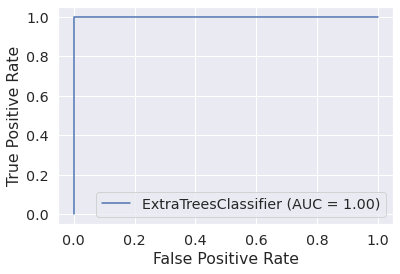

In [17]:
plot_roc_curve(model, test_X, test_y)

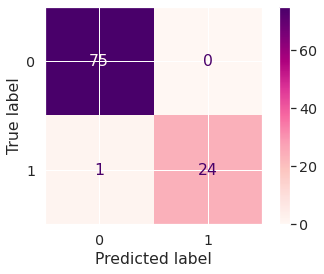

In [18]:
plot_confusion_matrix(model, test_X, test_y, cmap='RdPu')  